In [1]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

C:\Users\82103\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


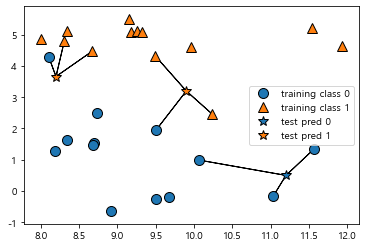

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

C:\Users\82103\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


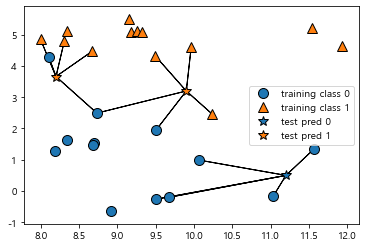

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

### knn의 k가 1인 경우의 알고리즘 (회귀 - 수치형 값의 예측)

- 예측하려고 하는 값이 연속형 갓이다. 아래 그래프는 하나의 feature를 이용하여 target

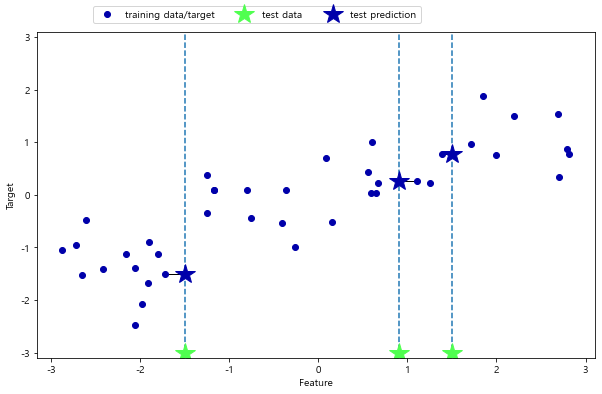

In [6]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [8]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                             random_state=0)

C:\Users\82103\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


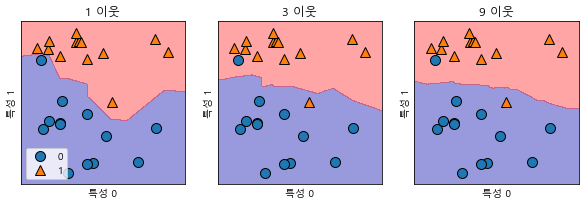

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    model = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(model, X, 
                                    fill=True, eps=0.5, ax=ax, alpha=.4)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

### 일반화, 과대적합, 과소적합

모델이 처음보는 데이터에 대해 예측이 가능하다면 이를 훈련세트에서 테스트 세트로 일반화되었다고 한다.

### 03. 유방암 데이터 셋 실습

- 데이터 셋: 위스콘신 유방암(Wisconsin Breast Cancer) 데이터 셋
- 각 종양은 악성(malignant-암 종양), 양성(benign-해롭지 않은 종양)

In [10]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [11]:
cancer = load_breast_cancer()
print("cancer.keys() : \n{}".format(cancer.keys()))
print("유방암 데이터의 행렬 : {}".format(cancer.data.shape))

cancer.keys() : 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
유방암 데이터의 행렬 : (569, 30)


In [15]:
print("특성이름(feature_name): {}".format(cancer['feature_names']))
print("유방암 데이터의 형태: ", cancer.data.shape)
print()
print("클래스 이름(target_names) : {}".format(cancer['target_names']))
print("클래스별 샘플 개수 : \n", np.bincount(cancer.target))

특성이름(feature_name): ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
유방암 데이터의 형태:  (569, 30)

클래스 이름(target_names) : ['malignant' 'benign']
클래스별 샘플 개수 : 
 [212 357]


In [17]:
### 데이터 준비
### 데이터 나누기 : 자체 학습 및 자체 평가
### 모델 지정
### 모델 학습
### 모델 예측 or 모델 평가
### 모델 평가(학습용), 모델 평가(테스트용)

In [22]:
from sklearn.model_selection import train_test_split

In [28]:
# 입력 / 출력
X = cancer.data
y = cancer.target

# 데이터 나누기 : 75%, 25%
# 5:5, 6:4, 8:2, 9:1
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=cancer.target,
                                                    test_size=0.3,
                                                    random_state=77) # random_state 지정 필수

- data를 랜덤으로 target을 나누게 되면 죽은사람만 나올 수도 있다. 이럴때 데이터가 불균형해지기 때문에 이를 해결하기위해 stratify 매개변수를 추가해준다.
- 너무 불균형할때 사용

In [31]:
print( len(y_train) )
y_1_all = (y == 1).sum() 
y_0_all =  (y == 0).sum() 

print(f"target y의 \n 0의 개수 : {y_0_all} \n 1의 개수 : {y_1_all}")

y_train_1 = (y_train == 1).sum()
y_test_1 = (y_test == 1).sum()

y_train_0 = len(y_train) - (y_train == 1).sum()
y_test_0 = len(y_test) - (y_test == 1).sum()

print("데이터 셋의 target(학습:테스트)의 비율 - 1에 대해서")
print(f"train비율 : {y_train_1/y_1_all}, test비율 : {y_test_1/y_1_all}")

print("데이터 셋의 target(학습:테스트)의 비율 - 0에 대해서")
print(f"train비율 : {y_train_0/y_0_all}, test비율 : {y_test_0/y_0_all}")

398
target y의 
 0의 개수 : 212 
 1의 개수 : 357
데이터 셋의 target(학습:테스트)의 비율 - 1에 대해서
train비율 : 0.7002801120448179, test비율 : 0.29971988795518206
데이터 셋의 target(학습:테스트)의 비율 - 0에 대해서
train비율 : 0.6981132075471698, test비율 : 0.3018867924528302


In [38]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3) # 알고리즘 지정
model.fit(X_train, y_train) # 학습
pred = model.predict(X_test) # 예측
pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [43]:
np.sum(pred == y_test)/len(y_test)

0.9181286549707602

In [51]:
acc_tr = model.score(X_train, y_train) # 학습용(train) 데이터 셋 이용
acc_test = model.score(X_test, y_test) # 평가용(test) 데이터 셋 이용

print("학습용 데이터 셋의 정확도 : ", acc_tr)
print("테스트용 데이터 셋의 정확도 : ", acc_test)

학습용 데이터 셋의 정확도 :  0.9547738693467337
테스트용 데이터 셋의 정확도 :  0.9181286549707602


### 가장 좋은 결과를 주는 k값?

In [61]:
### k값을 변경시키는 for문
### 모델을 지정
### 평가를 하고
### 평가한 결과를 저장

#### `-` n_neighbors 1~10

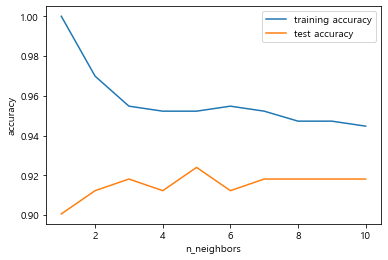

In [64]:
# 가장 좋은 결과를 주는 k값?
train_acc = []
test_acc = []

N_list = range(1,11)

for n in N_list:
    # 모델 생성
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))
    
plt.plot(N_list, train_acc, label = 'training accuracy')
plt.plot(N_list, test_acc, label = 'test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()

In [54]:
train_acc

[1.0,
 0.9698492462311558,
 0.9547738693467337,
 0.9522613065326633,
 0.9522613065326633,
 0.9547738693467337,
 0.9522613065326633,
 0.9472361809045227,
 0.9472361809045227,
 0.9447236180904522]

In [55]:
test_acc

[0.9005847953216374,
 0.9122807017543859,
 0.9181286549707602,
 0.9122807017543859,
 0.9239766081871345,
 0.9122807017543859,
 0.9181286549707602,
 0.9181286549707602,
 0.9181286549707602,
 0.9181286549707602]

#### `-` n_neighbors 1~20

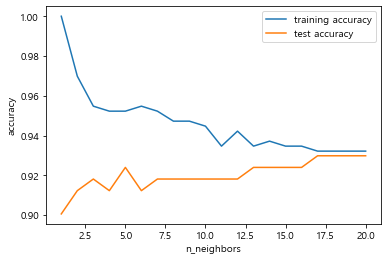

In [58]:
# 가장 좋은 결과를 주는 k값?
train_acc = []
test_acc = []

N_list = range(1,21)

for n in N_list:
    # 모델 생성
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))
    
plt.plot(N_list, train_acc, label = 'training accuracy')
plt.plot(N_list, test_acc, label = 'test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()

$k=17$ 일때 학습용, 테스트 셋의 정확도가 높으며 두 셋의 정확도 격차도 매우 적다.

#### `-` n_neighbors 1~30

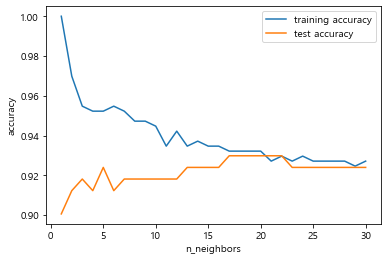

In [60]:
# 가장 좋은 결과를 주는 k값?
train_acc = []
test_acc = []

N_list = range(1,31)

for n in N_list:
    # 모델 생성
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X_train, y_train)
    
    # 정확도 구하기, 정확도 값 저장
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))
    
plt.plot(N_list, train_acc, label = 'training accuracy')
plt.plot(N_list, test_acc, label = 'test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()

```
### k값을 변경시키는 for문
###   모델을 지정
###   평가를 하고
###   평가한 결과를 저장.

k_list = []
tr_acc = []
test_acc = []
k_nums = range(1, 22, 2)

for n in k_nums:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    
    # 정확도 구하기
    acc_tr = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    
    # 정확도 값 저장.
    k_list.append(n)
    tr_acc.append(acc_tr)
    test_acc.append(acc_test)
    
    print("k : ", n)
    print("학습용 셋 정확도 : {:.3f}".format(acc_tr)  )
    print("테스트용 셋 정확도 : {:.3f}".format(acc_test)
```

In [72]:
train_acc

[1.0,
 0.9698492462311558,
 0.9547738693467337,
 0.9522613065326633,
 0.9522613065326633,
 0.9547738693467337,
 0.9522613065326633,
 0.9472361809045227,
 0.9472361809045227,
 0.9447236180904522]

In [73]:
test_acc

[0.9005847953216374,
 0.9122807017543859,
 0.9181286549707602,
 0.9122807017543859,
 0.9239766081871345,
 0.9122807017543859,
 0.9181286549707602,
 0.9181286549707602,
 0.9181286549707602,
 0.9181286549707602]

### 다른 방식?

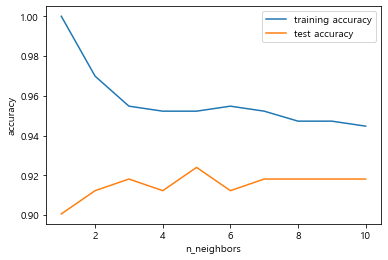

In [77]:
# 가장 좋은 결과를 주는 k값?
train_acc = []
test_acc = []

N_list = range(1,11)

for n in N_list:
    # 모델 생성
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X_train, y_train)
    pred_tr = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_acc.append(np.sum(pred_tr == y_train)/len(pred_tr))
    test_acc.append(np.sum(pred_test == y_test)/len(pred_test))

    
plt.plot(N_list, train_acc, label = 'training accuracy')
plt.plot(N_list, test_acc, label = 'test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()

### seaborn

In [79]:
import seaborn as sns

C:\Users\82103\anaconda3\envs\py38r40\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\82103\anaconda3\envs\py38r40\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


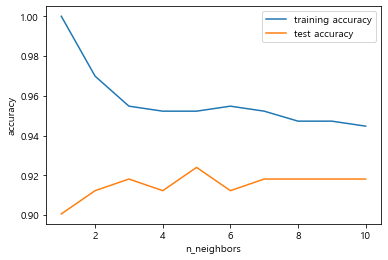

In [83]:
# 가장 좋은 결과를 주는 k값?
train_acc = []
test_acc = []

N_list = range(1,11)

for n in N_list:
    # 모델 생성
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))
    
sns.lineplot(N_list, train_acc, label = 'training accuracy')
sns.lineplot(N_list, test_acc, label = 'test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()

plt.show()

## 직접해보기

- k를 1부터 100까지 돌려보고 가장 높은 값을 갖는 k의 값을 구해보자.

### 실습해보기
- titanic 데이터 셋을 활용하여 knn 모델을 구한다.